In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':'15EOO-gPczWULVbR9NMH_-H4e9QElQJaD'}) # replace the id with id of file you want to access
downloaded.GetContentFile('movie_metadata.csv')

In [4]:
m_df=pd.read_csv('movie_metadata.csv')

In [5]:
m_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
m_df.shape

(5043, 28)

In [7]:
m_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
m_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [9]:
m_df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [10]:
m_df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],inplace=True)

In [11]:
#dropping the imdb link from dataset
m_df.drop('movie_imdb_link', axis=1, inplace=True)

In [12]:
m_df["color"].value_counts()

Color               4529
 Black and White     200
Name: color, dtype: int64

In [13]:
#removing the 'color' section as most of the movies is colored
m_df.drop('color',axis=1,inplace=True)

In [14]:
m_df.shape

(4737, 26)

In [15]:
m_df["content_rating"].fillna("R", inplace = True)

In [16]:
#Replacing the aspect_ratio with the median of the value as the graph is right skewed
m_df["aspect_ratio"].fillna(m_df["aspect_ratio"].median(),inplace=True)

In [17]:
#We need to replace the value in budget with the median of the value
m_df["budget"].fillna(m_df["budget"].median(),inplace=True)

In [18]:
# We need to replace the value in gross with the median of the value
m_df['gross'].fillna(m_df['gross'].median(),inplace=True)

In [19]:
# Recheck that all the null values are removed
m_df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [20]:
#Removing the duplicate values in the datset
m_df.drop_duplicates(inplace=True)

In [21]:
m_df.shape

(4695, 26)

In [22]:
m_df["language"].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Swedish          4
Hebrew           4
Dutch            4
Norwegian        4
Persian          4
Arabic           3
Thai             3
Indonesian       2
None             2
Aboriginal       2
Zulu             2
Dari             2
Vietnamese       1
Bosnian          1
Dzongkha         1
Aramaic          1
Kazakh           1
Icelandic        1
Greek            1
Polish           1
Hungarian        1
Telugu           1
Filipino         1
Romanian         1
Maya             1
Czech            1
Mongolian        1
Name: language, dtype: int64

In [23]:
#Most of the values for the languages is english we can drop the english column
m_df.drop('language',axis=1,inplace=True)

In [24]:
#Creating a new column to check the net profit made by the company (Gross-Budget) 
m_df["Profit"]=m_df['gross'].sub(m_df['budget'], axis = 0) 

In [25]:
#Creating a new column to check the profit percentage made by the company 
m_df['Profit_Percentage']=(m_df["Profit"]/m_df["gross"])*100
m_df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-260.942743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,Cavite,589,0,Quynn Ton,0.0,jihad|mindanao|philippines|security guard|squa...,35.0,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74,63071.0,90.010133
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,130.0,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,99.657017
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,written and directed by cast member,14.0,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413,-4416.0,-96.335079
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,26005908.0,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,6.0,Canada,R,20000000.0,2013.0,470.0,7.7,2.35,84,6005908.0,23.094398


In [26]:
#Value counts for the countries 
value_counts=m_df["country"].value_counts()
value_counts

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Ireland             11
Mexico              11
Russia              11
Denmark             11
Brazil               8
South Africa         8
Norway               7
Sweden               5
Netherlands          5
Argentina            4
Iran                 4
Thailand             4
Israel               3
Switzerland          3
Belgium              3
Czech Republic       3
West Germany         3
Romania              2
Iceland              2
Hungary              2
Taiwan               2
Greece               2
Poland               2
Bahamas              1
Kyrgyzstan           1
Chile                1
Libya                1
Colombia             1
Cambodia             1
Slovakia   

In [27]:
##get top 2 values of index
vals = value_counts[:2].index
vals

Index(['USA', 'UK'], dtype='object')

In [28]:
#dividing the country into three catogories 
m_df['country'] = m_df.country.where(m_df.country.isin(vals), 'other')

In [29]:
m_df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-260.942743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,Cavite,589,0,Quynn Ton,0.0,jihad|mindanao|philippines|security guard|squa...,35.0,other,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74,63071.0,90.010133
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,130.0,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,99.657017
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,written and directed by cast member,14.0,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413,-4416.0,-96.335079
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,26005908.0,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,6.0,other,R,20000000.0,2013.0,470.0,7.7,2.35,84,6005908.0,23.094398


In [30]:
#Successfully divided the country into three catogories
m_df["country"].value_counts()

USA      3568
other     707
UK        420
Name: country, dtype: int64

In [31]:
#Removing the director name column
m_df.drop('director_name', axis=1, inplace=True)

In [32]:
#Removing the actor1 ,actor 2 and actor 3 names
m_df.drop('actor_1_name',axis=1,inplace=True)

In [33]:
m_df.drop('actor_2_name',axis=1,inplace=True)
m_df.drop('actor_3_name',axis=1,inplace=True)
m_df.drop('movie_title',axis=1,inplace=True)
m_df.drop('plot_keywords',axis=1,inplace=True)

In [34]:
#Value count of genres
m_df['genres'].value_counts()

Drama                                    209
Comedy                                   186
Comedy|Drama|Romance                     182
Comedy|Drama                             180
Comedy|Romance                           149
                                        ... 
Animation|Family                           1
Action|Comedy|Fantasy|Horror               1
Action|Adventure|Drama|Western             1
Adventure|Animation|Comedy|Family|War      1
Action|Animation|Comedy|Crime|Family       1
Name: genres, Length: 875, dtype: int64

In [35]:
#Most of the values are equally distributed in genres column ,so we can remove the genres column
m_df.drop('genres',axis=1,inplace =True)

In [36]:
# Dropiing the profit column from the dataset
m_df.drop('Profit',axis=1,inplace=True)

In [37]:
#Dropping the profit percentage column from the dataset
m_df.drop('Profit_Percentage',axis=1,inplace=True)

In [38]:
#Adding the facebook likes of actor 2 and actor 3 together 
m_df['Other_actor_facebbok_likes']=m_df["actor_2_facebook_likes"] + m_df['actor_3_facebook_likes']

In [39]:
m_df.drop('actor_2_facebook_likes',axis=1,inplace=True)
m_df.drop('actor_3_facebook_likes',axis=1,inplace=True)
m_df.drop('cast_total_facebook_likes',axis=1,inplace=True)

In [40]:
#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.

m_df['critic_review_ratio']=m_df['num_critic_for_reviews']/m_df['num_user_for_reviews']

In [41]:
#Dropping the num_critic_for_review

m_df.drop('num_critic_for_reviews',axis=1,inplace=True)
m_df.drop('num_user_for_reviews',axis=1,inplace=True)

In [42]:
m_df = pd.get_dummies(data = m_df, columns = ['country'] , prefix = ['country'] , drop_first = True)
m_df = pd.get_dummies(data = m_df, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

In [43]:
m_df.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'facenumber_in_poster', 'budget',
       'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'Other_actor_facebbok_likes', 'critic_review_ratio', 'country_USA',
       'country_other', 'content_rating_G', 'content_rating_GP',
       'content_rating_M', 'content_rating_NC-17', 'content_rating_Not Rated',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_Passed',
       'content_rating_R', 'content_rating_TV-14', 'content_rating_TV-G',
       'content_rating_TV-PG', 'content_rating_Unrated', 'content_rating_X'],
      dtype='object')

In [44]:
m_df.isna().sum()

duration                      0
director_facebook_likes       0
actor_1_facebook_likes        0
gross                         0
num_voted_users               0
facenumber_in_poster          0
budget                        0
title_year                    0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
Other_actor_facebbok_likes    0
critic_review_ratio           0
country_USA                   0
country_other                 0
content_rating_G              0
content_rating_GP             0
content_rating_M              0
content_rating_NC-17          0
content_rating_Not Rated      0
content_rating_PG             0
content_rating_PG-13          0
content_rating_Passed         0
content_rating_R              0
content_rating_TV-14          0
content_rating_TV-G           0
content_rating_TV-PG          0
content_rating_Unrated        0
content_rating_X              0
dtype: int64

In [45]:
m_df['imdb_score']

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
       ... 
5034    6.3
5035    6.9
5037    6.4
5038    7.7
5042    6.6
Name: imdb_score, Length: 4695, dtype: float64

In [47]:
#X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio','movie_facebook_likes','Other_actor_facebbok_likes','critic_review_ratio','country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_TV-14','content_rating_TV-G','content_rating_TV-PG','content_rating_Unrated','content_rating_X'],data=m_df)
#y=pd.DataFrame(columns=['imdb_score'],data=m_df)
x=m_df.drop(['imdb_score'],axis=1)
y=m_df['imdb_score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [48]:
X_test,y_test

(      duration  ...  content_rating_X
 4480      92.0  ...                 0
 2732     100.0  ...                 0
 974      125.0  ...                 0
 350      124.0  ...                 0
 1267     136.0  ...                 0
 ...        ...  ...               ...
 1012     100.0  ...                 0
 1598     111.0  ...                 0
 3890     152.0  ...                 0
 2020     114.0  ...                 0
 4816      88.0  ...                 0
 
 [1409 rows x 28 columns], 4480    7.1
 2732    5.6
 974     5.8
 350     5.6
 1267    6.1
        ... 
 1012    5.4
 1598    6.2
 3890    6.7
 2020    5.3
 4816    7.8
 Name: imdb_score, Length: 1409, dtype: float64)

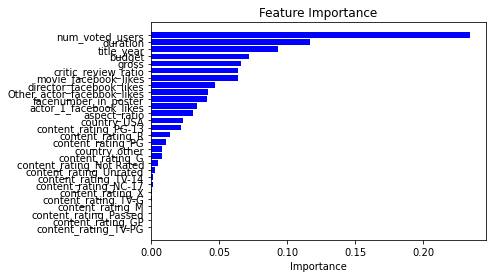

In [49]:
#feature importance
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
features=x.columns
importance = forest.feature_importances_
indices = np.argsort(importance)
plt.barh(range(len(indices)),importance[indices],color='b',align ='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [50]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
x_train = sc_X.fit_transform(X_train)
x_test = sc_X.transform(X_test)

In [51]:
x_train

array([[3.44936709e-01, 2.45909091e-02, 4.61538462e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.16455696e-01, 0.00000000e+00, 3.32692308e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.06962025e-01, 7.72727273e-04, 5.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.34177215e-01, 3.18181818e-04, 7.69230769e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.48101266e-01, 1.81818182e-01, 8.07692308e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.06962025e-01, 3.68181818e-03, 1.15384615e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [52]:
def RF():
    global x_train,x_test,y_train,y_test
    
    clf = RandomForestRegressor(n_estimators=50, max_features='sqrt')
    clf = clf.fit(x_train, y_train)
    
    predictions = clf.predict(x_test)
    df_output = pd.DataFrame()
    df_output['imdb_score'] = m_df['imdb_score']
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@RF.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
RF()

MAE=  0.559347054648687
MSE=  0.570617635202271
RMS=  0.7553923716865766

r_square: 0.5090707069810229

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9                 6.838
1            7.1                 5.444
2            6.8                 6.426
3            8.5                 6.002
5            6.6                 6.500
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [59]:
def svr():
    global x_train,x_test,y_train,y_test
    svr = SVR(kernel='rbf')
    svr = svr.fit(x_train, y_train)
    
    predictions = svr.predict(x_test)
    
    
    df_output = pd.DataFrame()
    df_output['imdb_score'] = m_df['imdb_score']
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@svr.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
svr()

MAE=  0.6388867797127653
MSE=  0.7470065141117602
RMS=  0.8642953859137281

r_square: 0.35731502633377177

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9              7.255143
1            7.1              6.223694
2            6.8              6.672364
3            8.5              6.309287
5            6.6              6.984011
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [54]:
def KNN():
    knn = KNeighborsRegressor()
    knn = knn.fit(x_train, y_train)
    
    predictions = knn.predict(x_test)
    df_output = pd.DataFrame()
    df_output['imdb_score'] = m_df['imdb_score']
    
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@knn.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
    
KNN()

MAE=  0.698736692689851
MSE=  0.8415806955287438
RMS=  0.9173770737972166

r_square: 0.2759483927833907

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9                  7.48
1            7.1                  5.54
2            6.8                  6.64
3            8.5                  6.54
5            6.6                  6.74
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]


In [55]:
def LR():
    lr = LinearRegression()
    lr = lr.fit(x_train, y_train)
    
    predictions = lr.predict(x_test)
    df_output = pd.DataFrame()
    df_output = pd.DataFrame()
    df_output['imdb_score'] = m_df['imdb_score']
    df_output['predicted_imdb_score'] = pd.DataFrame(predictions)
    df_output[['imdb_score','predicted_imdb_score']].to_csv('imdb_score@knn.csv',index=False)
    MAE= metrics.mean_absolute_error(y_test,predictions)
    MSE=metrics.mean_squared_error(y_test,predictions)
    RMS= np.sqrt(metrics.mean_squared_error(y_test,predictions))
    r_square = metrics.r2_score(y_test,predictions)
    print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
    print('MSE= ', metrics.mean_squared_error(y_test,predictions))
    print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    print('\nr_square:', r_square)
    print("\nPredicted values on the New Data:\n\n",df_output)
    
LR()

MAE=  0.6730357407306093
MSE=  0.7967052665789284
RMS=  0.8925834787732341

r_square: 0.314556843082069

Predicted values on the New Data:

       imdb_score  predicted_imdb_score
0            7.9              7.146369
1            7.1              6.126544
2            6.8              6.563556
3            8.5              6.139367
5            6.6              6.924195
...          ...                   ...
5034         6.3                   NaN
5035         6.9                   NaN
5037         6.4                   NaN
5038         7.7                   NaN
5042         6.6                   NaN

[4695 rows x 2 columns]
